In [1]:
%matplotlib notebook
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
X = np.loadtxt('../nick/data/design_parameters.dat')
y = np.loadtxt('../nick/data/non_dimensionalized_efficiency.dat')

In [3]:
s = Parameter(distribution='uniform', lower=-1., upper=1., order=2)
myparams = [s for _ in range(25)]

In [12]:
mybasis = Basis('total-order')
mypoly = Poly(parameters=myparams, basis=mybasis, 
              method='least-squares',\
              sampling_args={'mesh':'user-defined', 'sample-points': X,
                           'sample-outputs': y})
mypoly.set_model()

In [13]:
mysubspace = Subspaces(full_space_poly=mypoly, method='active-subspace')

<IPython.core.display.Javascript object>


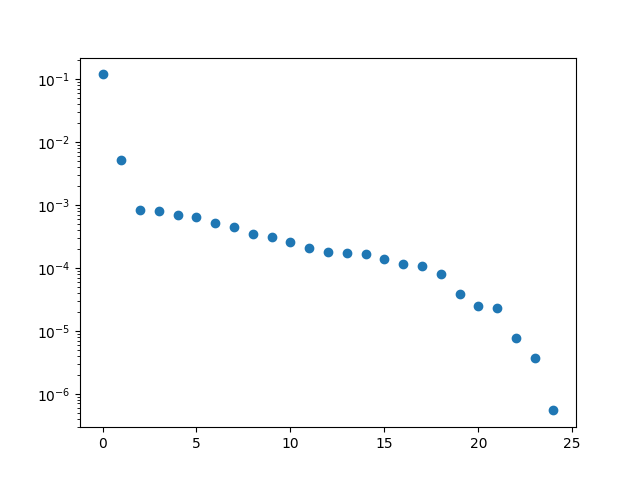

In [14]:
eigs = mysubspace.get_eigenvalues()
plt.semilogy(eigs, 'o')
plt.show()

In [15]:
W_all = mysubspace.get_subspace()
W = W_all[:,0:2]
print(X.shape)

(548, 25)


In [16]:
u = np.dot(X, W)

<IPython.core.display.Javascript object>


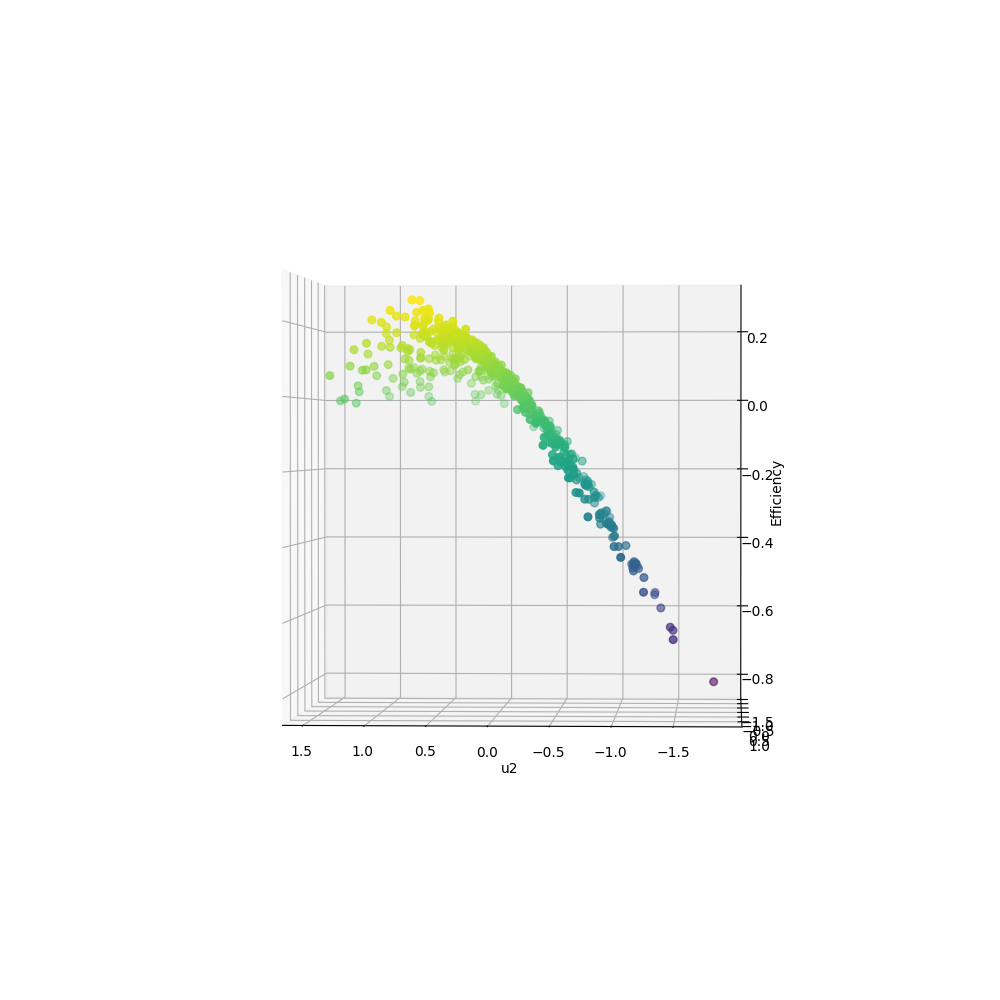

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], y,  s=30, c=y, marker='o')                                                                                
ax.set_xlabel('u1')
ax.set_xlabel('u2')
ax.set_zlabel('Efficiency')
plt.show()

In [18]:
mysubspace2 = Subspaces(method='variable-projection', sample_points=X, \
                       sample_outputs=y)

In [19]:
V = mysubspace2.get_subspace()
V = V[:,0:2]
z = np.dot(X , V)

<IPython.core.display.Javascript object>


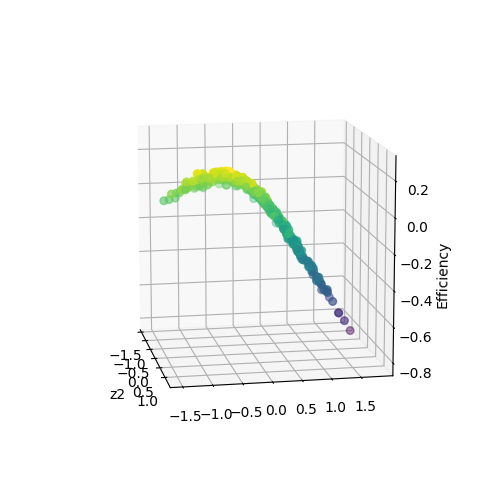

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z[:,0], z[:,1], y,  s=30, c=y, marker='o')                                                                                
ax.set_xlabel('z1')
ax.set_xlabel('z2')
ax.set_zlabel('Efficiency')
plt.show()